## <a id='home'></a>
# Datetime advanced

## Dealing with date, time, timedelta in python

* [now](#Now)
* [timezone](#Timezones)
* [Truncate](#Truncate)
* [Timedelta](#Timedelta)
* [(to and from) Strings](#Strings)
* [Unix timestamp](#Unix_timestamp)
* [numpy](#numpy)
* [pandas](#pandas)

In [8]:
from datetime import datetime, timedelta
from pytz import timezone
import pytz
from dateutil.relativedelta import *

## basics

## datetime basics

# Now

In [3]:
# in local timezone
datetime.now()

datetime.datetime(2018, 11, 14, 15, 26, 32, 61349)

In [5]:
# in utc
datetime.utcnow()

datetime.datetime(2018, 11, 14, 23, 27, 11, 965610)

# Timezones

[Home](#home)

#### ref.



[document for pytz](http://pytz.sourceforge.net/#localized-times-and-date-arithmetic)

## Define timezone

In [6]:
pst = timezone('US/Pacific-New')
cst = timezone('Asia/Shanghai') # china standard time
utc = pytz.utc

#### Get a list of time zones

In [7]:
# pytz.all_timezones

## "Localize": adding time zone information to datetime
adding info that "this is in utc time"

In [8]:
## adding info that "this is in utc time"
utc_time = utc.localize(datetime(2018, 8, 23, 22, 52, 8))

In [9]:
utc_time

datetime.datetime(2018, 8, 23, 22, 52, 8, tzinfo=<UTC>)

In [10]:
utc_time.tzinfo # this is the timezone information that can be used to "localize" a naive datetime object

<UTC>

This is the timezone information that can be used to "localize" a naive datetime object

## Convert timezones

In [13]:
# the original time should carry a timezone (be 'localized' to a timezone)
pst_time = utc_time.astimezone(pst)

print('UCT: {}'.format(utc_time))
print('PST: {}'.format(pst_time))

UCT: 2018-08-23 22:52:08+00:00
PST: 2018-08-23 15:52:08-07:00


### Timezone-safe comparison

In [11]:
print(utc_time)
print(pst_time)

utc_time == pst_time

2018-08-23 22:52:08.797172+00:00
2018-08-23 15:52:08.797172-07:00


True

# Truncate

[Home](#home)

## Truncate datetime

In [20]:
time1 = pst.localize(datetime(2018, 8, 23, 20, 52, 8, 0))
truncated_time1 = time1.replace(hour=0, minute=0, second=0, microsecond=0)

print('time1 :  ' + str(time1))
print('Truncated to date :  ' + str(truncated_time1))

time1 :  2018-08-23 20:52:08-07:00
Truncated to date :  2018-08-23 00:00:00-07:00


In [21]:
time2 = pst.localize(datetime(2018, 8, 23, 15, 52, 8, 0))
truncated_time2 = time2.replace(hour=0, minute=0, second=0, microsecond=0)

print('time2 :  ' + str(time2))
print('Truncated to date :  ' + str(truncated_time2))

time2 :  2018-08-23 15:52:08-07:00
Truncated to date :  2018-08-23 00:00:00-07:00


In [22]:
## After truncation should be the same
truncated_time1 == truncated_time2

True

## Truncate timedelta

In [38]:
def truncate_microseconds(delta):
    '''
    https://stackoverflow.com/questions/18470627/python-timedelta-remove-microseconds
    '''
    return delta - timedelta(microseconds=delta.microseconds)

In [39]:
time1 = pst.localize(datetime(2018, 8, 23, 20, 52, 8, 103))
time2 = pst.localize(datetime(2018, 8, 23, 20, 50, 8, 0))

# print('time 1 :  ' + str(time1))
# print('time 2 :  ' + str(time2))

print('Time delta: {}'.format(time1 - time2))
print('Time delta: {}'.format(truncate_microseconds(time1 - time2)))

Time delta: 0:02:00.000103
Time delta: 0:02:00


# Timedelta

* [timedelta to string](#timedelta_to_string)

[Home](#home)

## Sum timedelta: yes you can

In [41]:
sum([timedelta(1) , timedelta(2, seconds = 2)], timedelta())

datetime.timedelta(3, 2)

In [19]:
print(sum([timedelta(1) , timedelta(2, seconds = 2)], timedelta()))

3 days, 0:00:02


## Calender timedelta (relative time delta)

[Home](#home)

See discussion on [stackoverflow](https://stackoverflow.com/questions/35066588/is-there-a-simple-way-to-increment-a-datetime-object-one-month-in-python)

In [42]:
from dateutil.relativedelta import *

### Month to date

In [43]:
pst = timezone('US/Pacific-New')
today = pst.localize(datetime.now())
print(today)

2018-11-14 15:54:45.334779-08:00


In [44]:
month_to_date = today + relativedelta(months=-1)
print(month_to_date)

2018-10-14 15:54:45.334779-08:00


### in a week

In [47]:
next_week = today + relativedelta(weeks=1)
print(next_week)

2018-11-21 15:54:45.334779-08:00


### "The second Tuesday next month"

In [45]:
next_meeting = today + relativedelta(months=+1, day=1, weekday=TU(2))
print(next_meeting)

2018-12-11 15:54:45.334779-08:00


# Strings

## Timestamp_to_string

[Home](#home)

#### Cheat sheet for most seen formats

In [49]:
ts = datetime.now()

In [25]:
ts.strftime("%Y-%b(%B)-%d %H:%M:%S")

'2018-Oct(October)-02 15:41:17'

In [26]:
ts.strftime("%Y-%m-%d (%a / %A) %H:%M:%S")

'2018-10-02 (Tue / Tuesday) 15:41:17'

In [27]:
utc.localize(ts).strftime("%Y-%m-%d %I:%M (%p)")

'2018-10-02 03:41 (PM)'

In [28]:
utc.localize(ts).strftime("%Y-%m-%d %I:%M %p (%Z)")

'2018-10-02 03:41 PM (UTC)'

## String to timestamp

[Home](#home)

In [51]:
ts_str = utc.localize(ts).astimezone(pst).strftime("%Y-%m-%d %I:%M %p (%z)")

In [52]:
ts_str 

'2018-11-14 07:57 AM (-0800)'

In [53]:
ts2 = datetime.strptime(ts_str,"%Y-%m-%d %I:%M %p (%z)")
ts2

datetime.datetime(2018, 11, 14, 7, 57, tzinfo=datetime.timezone(datetime.timedelta(-1, 57600)))

### Hour (as a number) to string

[Home](#home)

1. Direct formating
2. `print` timedelta
3. make a trivial datetime and `strftime`

In [54]:
"%02d:00" % 1

'01:00'

In [55]:
h=15.3
print(timedelta(hours = h))

15:18:00


In [56]:
td = timedelta(hours = h)

### timedelta_to_string

In [57]:
def timedelta2str(td):
    '''
    if the str(td) does not work
    '''
    (h, res) = divmod(int(td.total_seconds()), 3600)
    (m, s) = divmod(res, 60)
    return '{:02}:{:02}:{:02}'.format(h,m,s)

In [58]:
timedelta2str(td)

'15:18:00'

In [59]:
(datetime(1,1,1) + timedelta(hours = h)).strftime("%I:%M %p")

'03:18 PM'

# Unix_timestamp

(Bigint, 1494032110 stands for 2017-05-06 08:55:10 CST)

[Home](#home)

In [33]:
utc.localize(datetime.utcfromtimestamp(1494032110)).astimezone(cst)

datetime.datetime(2017, 5, 6, 8, 55, 10, tzinfo=<DstTzInfo 'Asia/Shanghai' CST+8:00:00 STD>)

# numpy

[Home](#home)


In [3]:
import numpy as np

In [14]:
times =  np.array(['2019-01-01', '2019-01-02'], dtype='datetime64') # [D]
times =  np.array(['2019-01-01', '2019-01-02'], dtype='datetime64[m]')
times =  np.array(['2019-01-01', '2019-01-02'], dtype='datetime64[s]')

In [15]:
times[1]

numpy.datetime64('2019-01-02T00:00:00')

In [16]:
np.arange('2019-01-01', '2019-01-05', 1, dtype='datetime64[D]')

array(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'],
      dtype='datetime64[D]')

In [18]:
np.arange('2019-01-01', '2019-01-02', 4, dtype='datetime64[h]')

array(['2019-01-01T00', '2019-01-01T04', '2019-01-01T08', '2019-01-01T12',
       '2019-01-01T16', '2019-01-01T20'], dtype='datetime64[h]')

# pandas

[Home](#home)

In [19]:
import pandas as pd

In [20]:
pd.date_range('2019-08-10', periods= 7, freq='D')

DatetimeIndex(['2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('Aug 10, 2019', periods= 7, freq='D')

DatetimeIndex(['2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16'],
              dtype='datetime64[ns]', freq='D')

In [22]:
pd.to_datetime(['2019-01-09', '01/09/2019', 'Jan 9, 2019'])

DatetimeIndex(['2019-01-09', '2019-01-09', '2019-01-09'], dtype='datetime64[ns]', freq=None)

### note that it is default into US format

In [23]:
pd.to_datetime('3/1/2019', format='%d/%m/%Y')

Timestamp('2019-01-03 00:00:00')

In [25]:
# read 
df = pd.read_csv('data/daily-min-temperatures.csv', index_col='Date', parse_dates=True)

In [26]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

### Temporal resample: like groupby

In [31]:
df.resample(rule='A').sum()#.plot.bar()

,Temp
Date,
1981-12-31,4203.8
1982-12-31,3936.0
1983-12-31,4083.4
1984-12-31,3866.0
1985-12-31,4065.2
1986-12-31,3943.2
1987-12-31,3961.4
1988-12-31,4369.8
1989-12-31,4110.6


#### [rule code](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

## quick viz

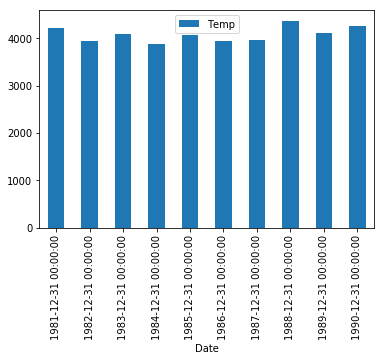

In [30]:
df.resample(rule='A').sum().plot.bar()